In [1]:
import os
import argparse
import torch
import torch.nn as nn
import time
# torch.backends.cudnn.benchmark = True

# example for mnist
from datas.TomoLoader import TomoLoader
from datas.CSVLoader import CSVLoader
from datas.FoldLoader import FoldGenerator

#import utils
from datas.preprocess3d import TRAIN_AUGS_3D, TEST_AUGS_3D
from datas.preprocess25d import TRAIN_AUGS_25D, TEST_AUGS_25D
from datas.preprocess2d import TRAIN_AUGS_2D, TEST_AUGS_2D

from Logger import Logger

from models.Densenet3d import d169_3d, d121_3d, d201_3d, dwdense_3d, d264_3d, dhy_3d
#from models.EffiDense3d import ed169_3d
from models.fishnet import fishnet150, fishnet99, fishnetdw3
from models.fishnet import fishnetdw as fishdw_origin

from models.fishnet2 import fishdw2, fishdw, fish150
from models.fishnet2_2d import fishdw2_2d, fishdw_2d, fish150_2d
from models.fish_exfuse import fishdw_exfuse
from models.fish_dropmax import fishdw as fish_dropmax

#from runners.TomoRunner import TomoRunner
#from runners.FoldRunner import FoldRunner
#from runners.TransferRunner import TransferRunner
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
"""parsing and configuration"""

'parsing and configuration'

In [2]:
net = fishdw_2d(1, 2, 'in', 'lrelu')

tform_test = TEST_AUGS_25D
tform_train = TRAIN_AUGS_25D
data_path = '/data02/gkim/stem_cell_jwshin/data/data_check_25d'
test_loader = TomoLoader(data_path, batch_size=1,#32,#arg.batch_size,
                                   transform=tform_train, aug_rate=0,
                                   num_workers=1, shuffle=False, drop_last=False)



Tail Channels :  [16, 32, 64, 128]
Body Channels :  [(128, 128), (192, 96), (128, 64)]
Head Channels :  [(80, 80), (208, 208), (400, 400), (528, 528)]
FishNet Initialzation Start
{'Jax_untreated': 0}
Dataset Dir :  /data02/gkim/stem_cell_jwshin/data/data_check_25d len :  1


In [3]:

test_iter = iter(test_loader)
input_, target_, inputDir_ = next(test_iter)

(1089, 1000, 12)
(1024, 1024, 12)
<class 'numpy.ndarray'>
(1024, 1024, 12)
(1024, 1024, 12)
(1024, 1024, 12)
(1024, 1024, 12)
(1024, 1024, 12)
(12, 1024, 1024)
torch.Size([12, 1024, 1024])


In [4]:
input_.numpy().shape

(1, 12, 1024, 1024)

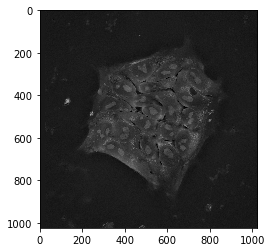

In [5]:
plt.imshow(input_.numpy()[:,3,:,:].squeeze(),cmap='gray', vmin=0, vmax=1)



In [6]:
input_.numpy().squeeze()[1936:1968,1536:1568]

array([], shape=(0, 0, 1024), dtype=float32)